# Individual Assignment - Week 3

## Pandas,Reading/Writing Data Assignment

### Joshua Dollison
### CIS591-86718
### 9/9/2025

### 1 - Read Data

Create a data frame to store the data read from the file.

In [1]:
import pandas as pd

# Read the data from a csv
#   There is some noise in outside columns, so only use the columns that we want
df = pd.read_csv('IA_3_Temperature_DailySale.csv', 
                 usecols=['Date', 'Daily Units Sold', 'Daily Temperature (C)'])

# print out the dadta
print(df.tail())


         Date  Daily Units Sold  Daily Temperature (C)
15  1/16/2025               330                     24
16  1/17/2025               370                     28
17  1/18/2025               370                     27
18  1/19/2025               320                     24
19  1/20/2025               330                     25


### 2 - Summarize Data

Get a summary of each data field (i.e., the count, mean, standard deviation, minimum, maximum, ... etc. )  

In [2]:
# Use the describe method to get some simple stats from loaded data
print(df.describe())

       Daily Units Sold  Daily Temperature (C)
count         20.000000              20.000000
mean         345.500000              26.050000
std           34.561159               2.282081
min          300.000000              22.000000
25%          317.500000              24.750000
50%          345.000000              26.000000
75%          370.000000              27.250000
max          420.000000              30.000000


### 3 - Examine Correlation Relationship

Use the Pearson Correlation function to examine the correlation relationship between daily sold units and daily temperature

In [3]:
# import the necessary library
import scipy.stats

# get r and p-value
r, p = scipy.stats.pearsonr(df['Daily Temperature (C)'], df['Daily Units Sold'])

# because this week is about pandas dataframe, i'm going to
#    load my values into a dataframe
pearson_df = pd.DataFrame(
    {
        'Comparison' : ['Temperature v Daily Units Sold'],
        'Corr. Coeff': [r],
        'P-Value': [p]
    }
)

# and then print that dataframe as a table
pearson_df

,Comparison,Corr. Coeff,P-Value
0,Temperature v Daily Units Sold,0.837139,0.000004


### 4 - Sort Data

Sort the data frame according to the number of units sold per day

In [4]:
# sort the data by units sold
#   store sorted df in new var
sorted_data = df.sort_values('Daily Units Sold')

### 5 - Save Data

Write the sorted data frame to a csv file named "*GreenTote_analysis_YourLastName_FirstName.csv

In [5]:
sorted_data.to_csv('GreenTote_analysis_DOLLISON_JOSHUA.csv', index=False)

#### Extra - I want to visualize the correlation measures

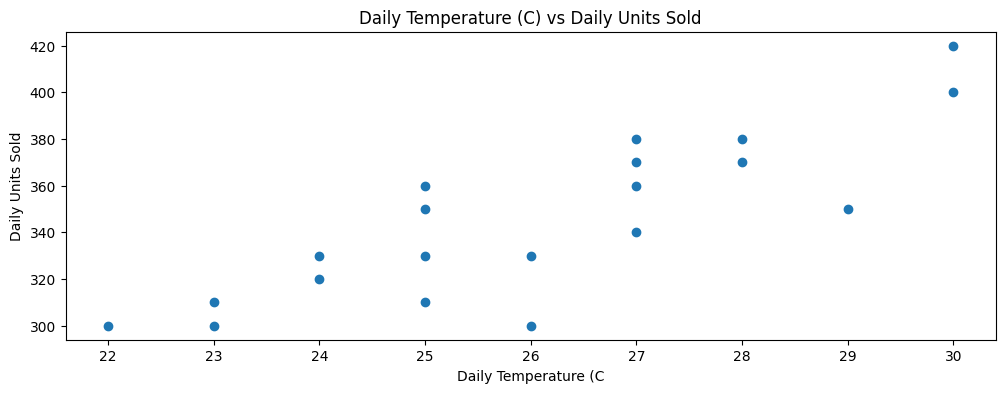

In [6]:
# Simple scatterplots to visualize correlations
import matplotlib.pyplot as plt

# Plot GreenTote vs SolarTrek
plt.figure(figsize=(12,4))
plt.scatter(df['Daily Temperature (C)'], df['Daily Units Sold'])
plt.title("Daily Temperature (C) vs Daily Units Sold")
plt.xlabel("Daily Temperature (C")
plt.ylabel("Daily Units Sold")
plt.show()


### 6 - Conclusion

### Analysis Interpretation

* My returned correlation coefficient meets the definition of "correlation is very strong" as given by the Week 1 presentation
  * Daily units sold tend to increase with temperature increase
  * The use of temperature as an independent var and units sold as a dependent var is a reasonable comparison
* The returned p-value is far below the threshold of 0.05, signifying that the relationship is statistically significant and not due to random chance

### Recommendation

We are provided with two options to choose from, pending the results of our analysis:
* Option 1: Develop a marketing campaign that considers weather information to strategize the sales of GreenTote
  * We would expect to choose this option if temperature was proven to be correlated with product unit sales
* Option 2: Use a random campaign to help increase the sales for the new year
  * We would expect to choose this option if temperature was proven to be uncorrelated with product unit sales
 
Given our results, we see that temperature had a strong correlation with unit sales.  This gives us a data-centric justification for choosing option #1.  While correlation does not imply causation, using this correlation to influcence our recommendation seems to have greater merit than just randomly selecting campaign.

<div class="alert alert-block alert-success">
    Therefore, my <b><u>recommendation</u></b> is <b>Option 1:</b> Develop a marketing campaign that considers weather information to strategize the sales of GreenTote.</div>
